# Project: Post Disaster Sentiment Analysis 
## Nick Giorgio & Leila Moinpour

### Research Questions: 
#### 1. How does public sentiment evolve over the course of a natural disaster and its recovery? What emotions are most commonly expressed by affected communities in the aftermath of a disaster ? (Timeline & Change in Sentiments on Social Media) 

#### 2. Are there significant differences in sentiment based on location or disaster type like a Fire vs Hurricane vs Earthquake in just USA (scoped to this for english speaking focus + similar policies across nation) Scope the severity of the disaster re: losses/damages roughly the same? We will look a these data sets in more detail and then decide if we want to broaden the scope to compare between types 



### Data: 
#### 1. Crisis NLP has data from wildfires including annotated tweets from 2018 California Wildfires (we can select a few events here? – need to check if the information is all in english for international events) 

#### 2. Twitter Sentiment Dataset has dataset of around 50,000 disaster related tweets with sentiment polarity

#### 3. Hurricane Laura (2020) has a publicly available Twitter dataset with over 1 million tweets regarding the disaster. It was collected with a Twitter API and includes raw tweet JSON data. Each tweet includes text, timestamp, and available geolocation/ place tags.




In [2]:
import pandas as pd
from textblob import TextBlob
import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Testing Senitment  function

In [3]:
sentence = TextBlob('So mad the fires have disctroyed so many homes.))')
print(sentence.sentiment)

Sentiment(polarity=-0.0625, subjectivity=0.75)


## Loading Data containing Tweets from differnt natural disasters

In [23]:
ca_wildfire = pd.read_csv('data/cleaned_california_wildfires_tweets.csv')
hurrican_sandy = pd.read_csv('data/cleaned_hurrican_sandy_tweets.csv')
hurrican_mathew = pd.read_csv('data/cleaned_hurrican_mathews_tweets.csv')
canda_wildfires = pd.read_csv('data/cleaned_canda_wildfire_tweets.csv')
italy_earthquake = pd.read_csv('data/cleaned_italy_earthquake_tweets.csv')

## Going through each text column and calculating its sentiment score using Textblob

In [24]:
disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    "Canada Wildfires": canda_wildfires,
    "Italy Earthquake": italy_earthquake
}

for name, df in disaster_datasets.items():
    print(f"\n--- {name} ---")
    # Try to find the appropriate text column
    if 'text' in df.columns:
        text_col = 'text'
    elif 'tweet_text' in df.columns:
        text_col = 'tweet_text'
    elif 'cleaned_text' in df.columns:
        text_col = 'cleaned_text'
    else:
        print("No text column found.")
        continue
    sentiments = []
    for c in df[text_col]:
        sentiments.append(TextBlob(str(c)).sentiment.polarity)
    for i in range(min(20, len(df))):
        print("Sentiment:", round(sentiments[i], 2), "Comment:", df[text_col].iloc[i])



--- California Wildfire ---
Sentiment: 0.25 Comment: Entertainment Tonight Dave Grohl Delivers Food to First Responders Fighting California Wildfires via
Sentiment: -0.1 Comment: Residents are oftentimes left no choice but to leave their animals behind when wildfires strike We not only protect human lives and property but animals as well Firefighters ensured that there is plenty of food and water until residents can return to their homes
Sentiment: 0.09 Comment: HEADLINES BLAME THIS ON WILDFIRE BUT LOOKS LIKE CRIME AGAINST HUMANITY Buildings obliterated Cars melted Surrounding trees intact 84 confirmed dead 560 missing Residents warned against returning Area rich in gold diamonds
Sentiment: 0.39 Comment: Almost 200 Australian and NZ firefighters sent to help with US wildfires If you buy a Compact car great Environment friendly The government needs to be encouraging Trump is so backwards Why is it called EPA
Sentiment: -0.11 Comment: Police arrest suspect for setting off massive Califo

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
wildfire['sentiment'] = wildfire['cleaned_text'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Plotting sentiment change over time. Converterd the timestamp into year-month-date format

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

for df in [hurrican_mathew, canda_wildfires, italy_earthquake]:
    if 'cleaned_text' in df.columns:
        df['sentiment'] = df['cleaned_text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

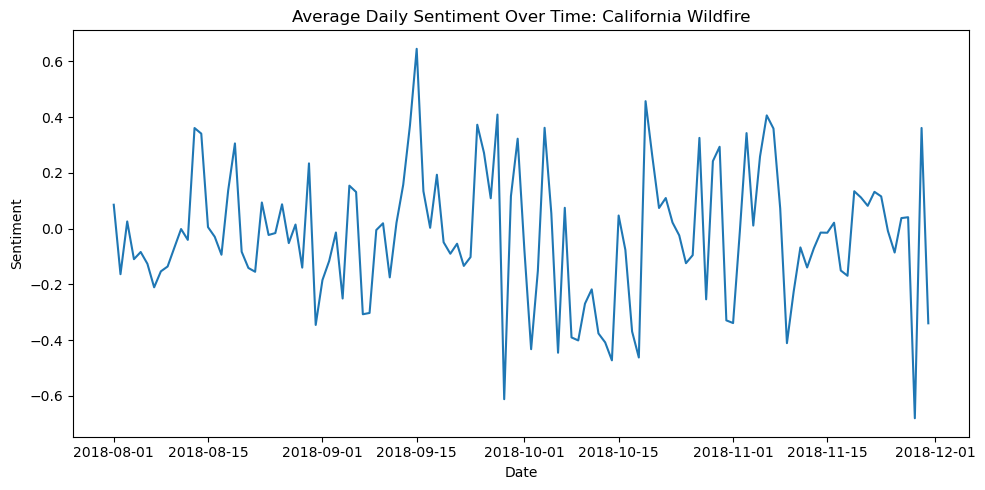

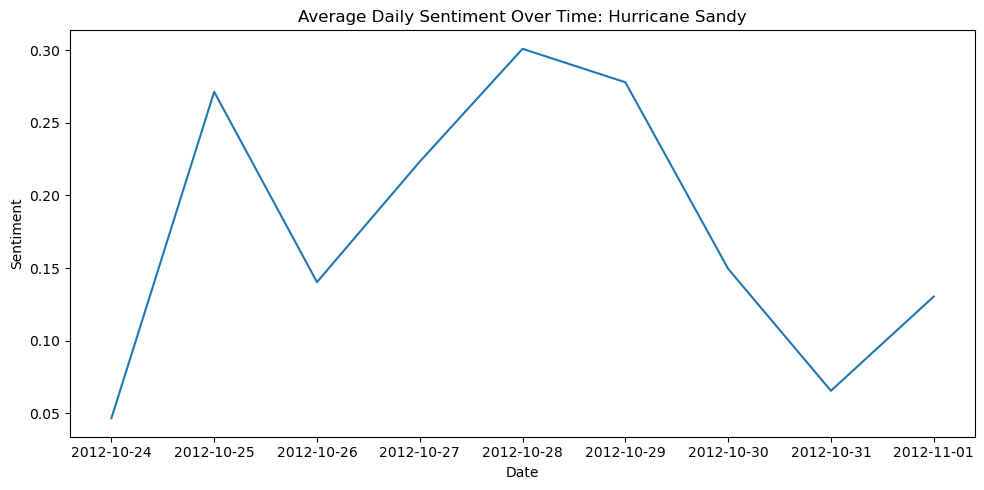

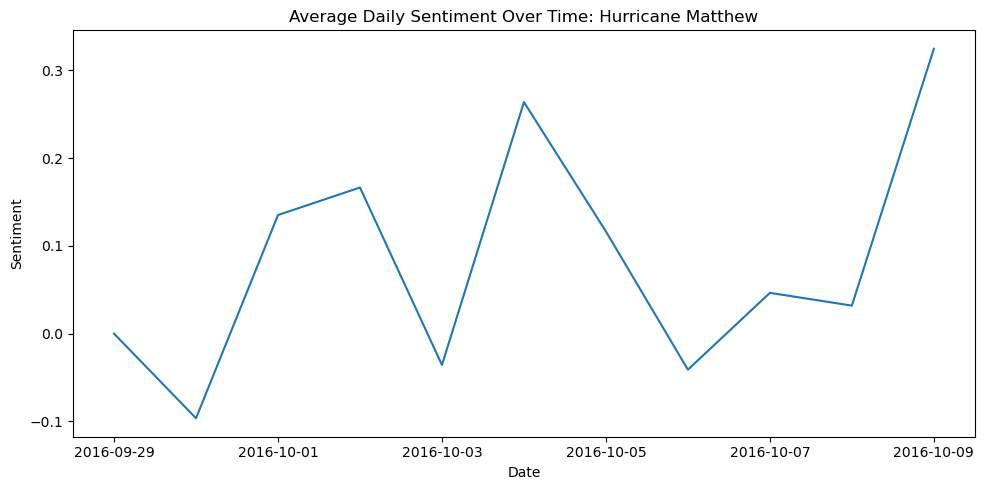

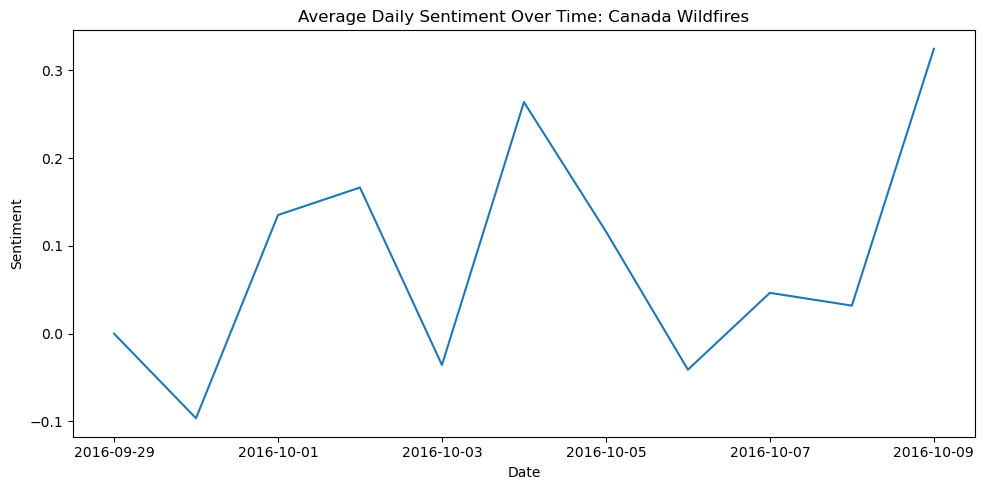

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    "Canada Wildfires": canda_wildfires,
    "Italy Earthquake": italy_earthquake
}

for name, df in disaster_datasets.items():
    if 'timestamp' in df.columns and 'sentiment' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['timestamp'], unit='d', origin='1899-12-30')
        except Exception:
            df['date'] = pd.to_datetime(df['timestamp'], errors='coerce')
        sentiment_by_day = df.groupby(df['date'].dt.date)['sentiment'].mean()
        plt.figure(figsize=(10, 5))
        sentiment_by_day.plot()
        plt.title(f'Average Daily Sentiment Over Time: {name}')
        plt.ylabel('Sentiment')
        plt.xlabel('Date')
        plt.tight_layout()
        plt.show()

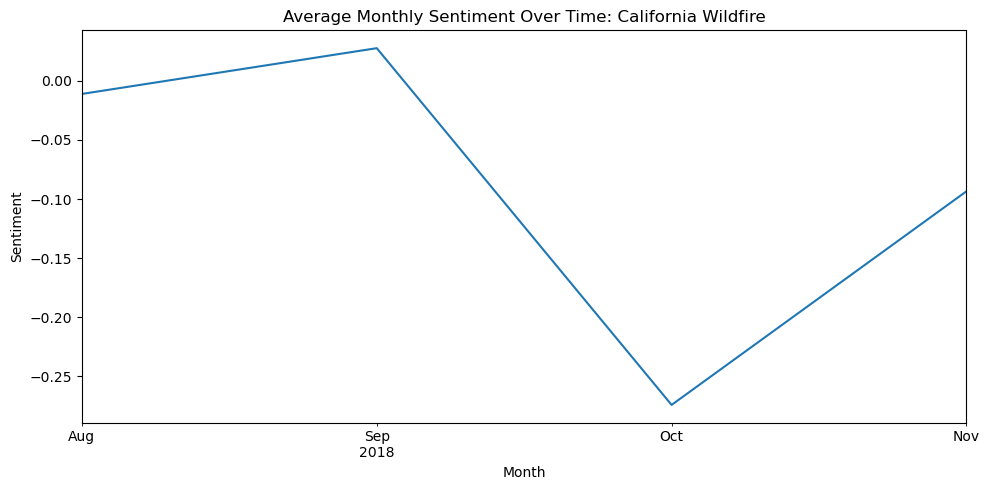

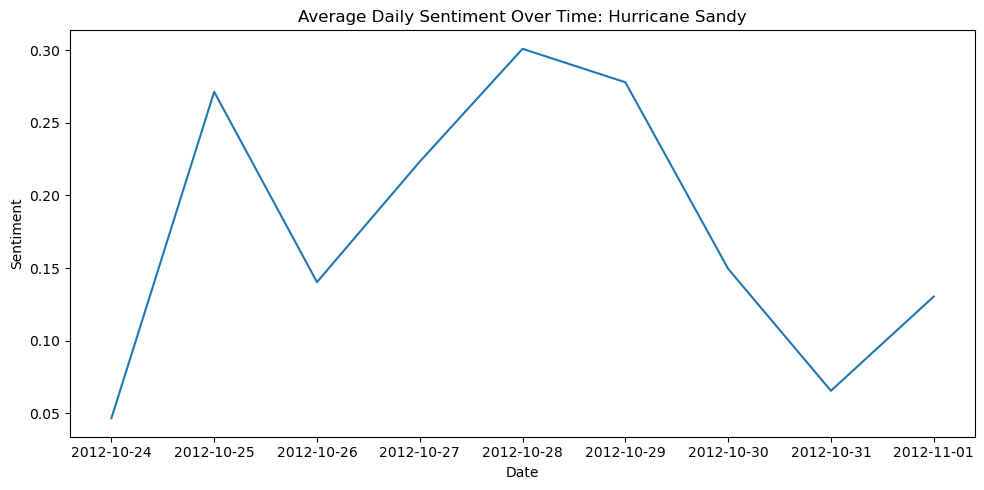

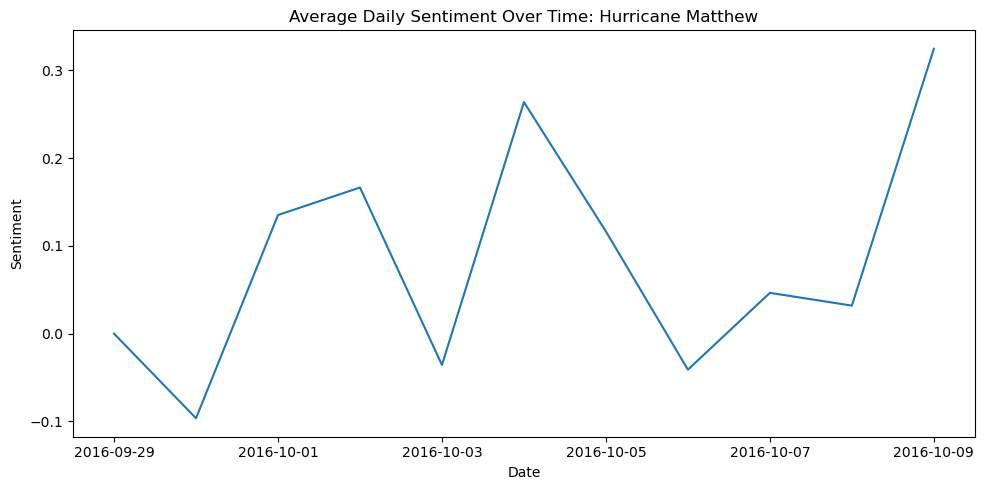

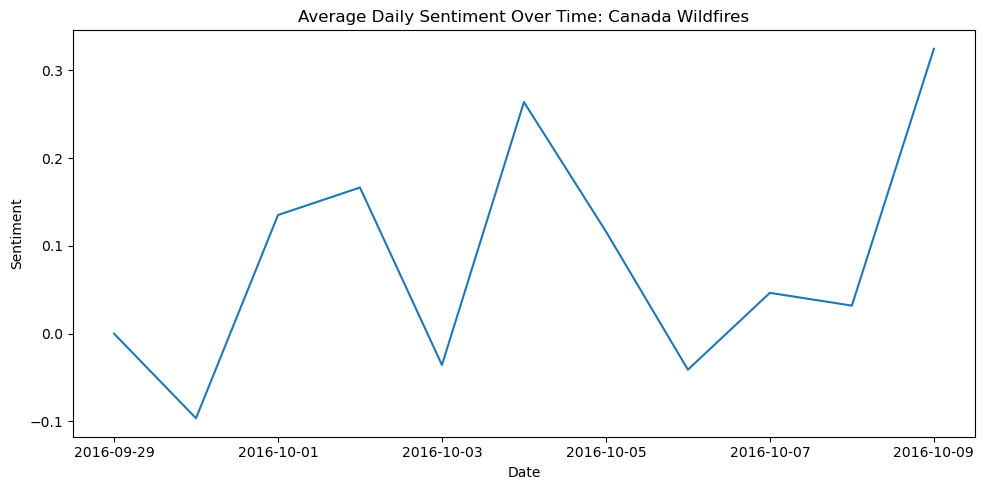

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

disaster_datasets = {
    "California Wildfire": ca_wildfire,
    "Hurricane Sandy": hurrican_sandy,
    "Hurricane Matthew": hurrican_mathew,
    "Canada Wildfires": canda_wildfires,
    "Italy Earthquake": italy_earthquake
}

for name, df in disaster_datasets.items():
    if 'timestamp' in df.columns and 'sentiment' in df.columns:
        try:
            df['date'] = pd.to_datetime(df['timestamp'], unit='d', origin='1899-12-30')
        except Exception:
            df['date'] = pd.to_datetime(df['timestamp'], errors='coerce')
        plt.figure(figsize=(10, 5))
        if name == "California Wildfire":
            sentiment_by = df.groupby(df['date'].dt.to_period('M'))['sentiment'].mean()
            sentiment_by.plot()
            plt.title(f'Average Monthly Sentiment Over Time: {name}')
            plt.xlabel('Month')
        else:
            sentiment_by = df.groupby(df['date'].dt.date)['sentiment'].mean()
            sentiment_by.plot()
            plt.title(f'Average Daily Sentiment Over Time: {name}')
            plt.xlabel('Date')
        plt.ylabel('Sentiment')
        plt.tight_layout()
        plt.show()